#  Task 8:  Traffic Sign Recognition Description 
## *Description:*
1. Dataset (Recommended): [GTSRB (Kaggle)](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign).
2. Classify traffic signs based on their image using deep learning.
3. Preprocess images (resizing, normalization).
4. Train a CNN model to recognize different traffic sign classes.
5. Evaluate performance using accuracy and confusion matrix.

## Necessary libraries

In [1]:
from src.load_data import load_data
from src.train import train
from src.model import SimpleCNN
from src.pretrained import load_pretrained_model,freeze_layers,eval_model
from src.evaluate import eval,evaluate_model_with_images
from src.utils import plot_accuracy_loss,plot_classification_report,plot_confusion_matrix,evaluate_model
from sklearn.metrics import roc_auc_score
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Training Custom CNN 

Size of the training dataloader: 1961
Size of the test dataloader: 491
--------------------Training Started---------------------
Epoch [1/5], Train Loss: 0.7177, Train Accuracy: 79.32%
Epoch [1/5], Test Loss: 0.16273, Test Accuracy: 95.96% 
Epoch [2/5], Train Loss: 0.1248, Train Accuracy: 96.46%
Epoch [2/5], Test Loss: 0.13090, Test Accuracy: 96.35% 
Epoch [3/5], Train Loss: 0.0726, Train Accuracy: 97.80%
Epoch [3/5], Test Loss: 0.09660, Test Accuracy: 97.70% 
Epoch [4/5], Train Loss: 0.0544, Train Accuracy: 98.39%
Epoch [4/5], Test Loss: 0.19164, Test Accuracy: 95.11% 
Epoch [5/5], Train Loss: 0.0409, Train Accuracy: 98.79%
Epoch [5/5], Test Loss: 0.10248, Test Accuracy: 97.85% 
--------------------Training Ended ----------------------
Accuracy of the network on the test set:  97.84%


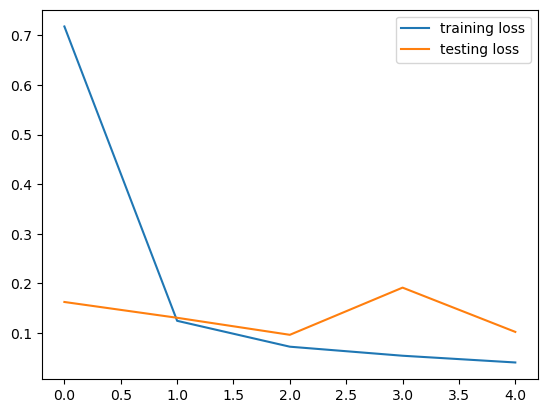

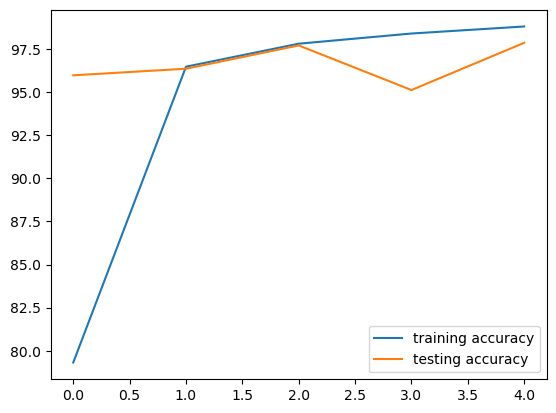

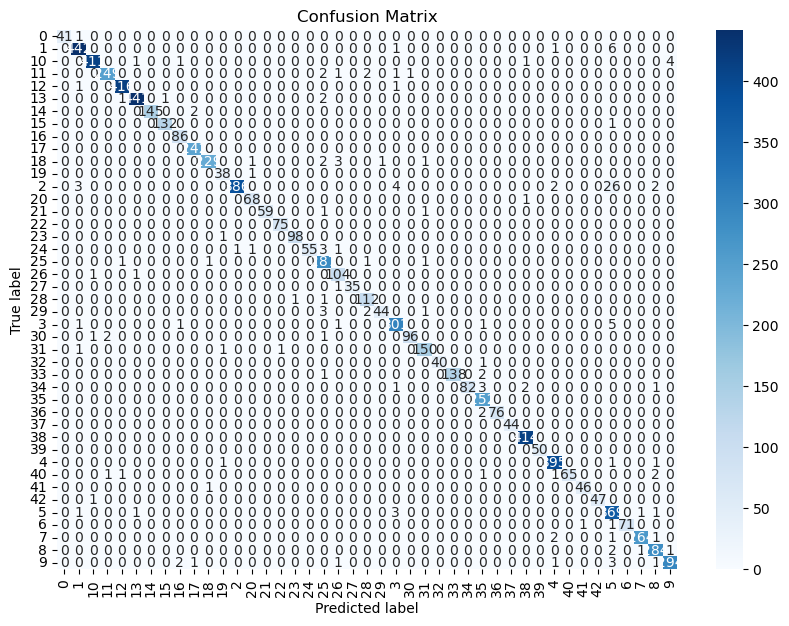

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.98      0.98      0.98       450
           2       0.99      0.98      0.99       418
           3       0.99      0.97      0.98       256
           4       0.99      1.00      0.99       418
           5       0.99      0.99      0.99       445
           6       1.00      0.99      0.99       147
           7       0.99      0.99      0.99       133
           8       0.96      1.00      0.98        86
           9       0.99      1.00      0.99       242
          10       0.99      0.97      0.98       237
          11       0.93      0.97      0.95        39
          12       1.00      0.91      0.95       423
          13       0.96      0.99      0.97        69
          14       1.00      0.97      0.98        61
          15       0.99      1.00      0.99        75
          16       0.99      0.99      0.99        99
          17       1.00    

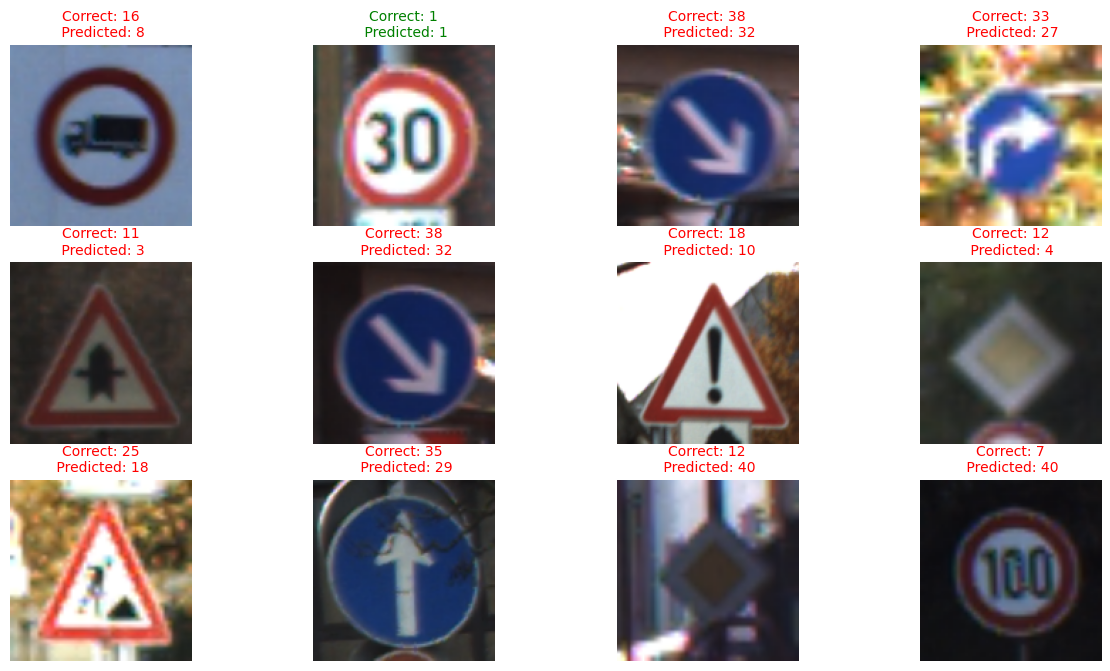

In [4]:
train_loader, test_loader, classes = load_data('train')
num_classes = len(classes)
model = SimpleCNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5
history = train(model,train_loader,test_loader,device,num_epochs,optimizer,criterion, learning_rate = 1e-3)
# Test Accuracy
eval(model,test_loader,device)
# Evaluate model
y_true, y_pred = evaluate_model(model, test_loader,device)
    
# Plot results
plot_accuracy_loss(history,mode='loss')
plot_accuracy_loss(history,mode='accuracy')
plot_confusion_matrix(y_true, y_pred, classes)
plot_classification_report(y_true, y_pred)
roc = roc_auc_score(y_true,y_pred,multi_class='ovr')
print(f'Roc score: {roc:.4f}')
# Evaluate the model with images
evaluate_model_with_images(model,'Test.csv',num_images=12,test_folder='Test',batch_size=16)


## Training (VGG19, Mobilenet)

Training vgg19...
--------------------Training Started---------------------
Epoch [1/5], Train Loss: 3.5131, Train Accuracy: 5.54%
Epoch [1/5], Test Loss: 3.48721, Test Accuracy: 5.32% 
Epoch [2/5], Train Loss: 3.4999, Train Accuracy: 5.38%
Epoch [2/5], Test Loss: 3.48936, Test Accuracy: 5.73% 
Epoch [3/5], Train Loss: 3.4973, Train Accuracy: 5.56%
Epoch [3/5], Test Loss: 3.48257, Test Accuracy: 5.38% 
Epoch [4/5], Train Loss: 3.4946, Train Accuracy: 5.52%
Epoch [4/5], Test Loss: 3.48526, Test Accuracy: 5.73% 
Epoch [5/5], Train Loss: 3.4945, Train Accuracy: 5.54%
Epoch [5/5], Test Loss: 3.48348, Test Accuracy: 5.38% 
--------------------Training Ended ----------------------
Accuracy of the network on the test set:  5.39%


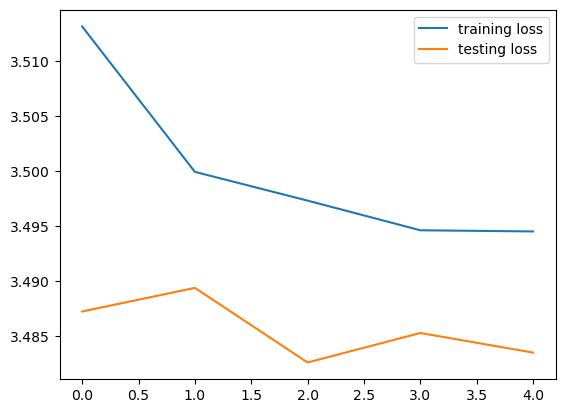

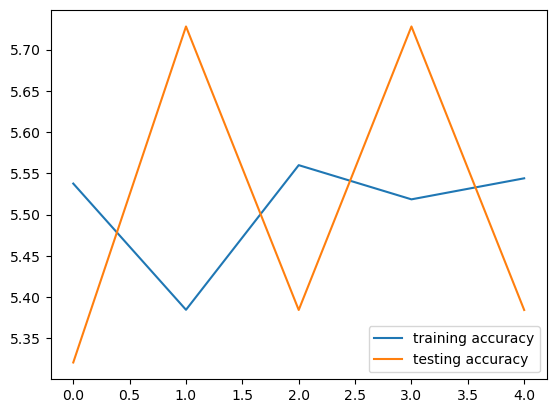

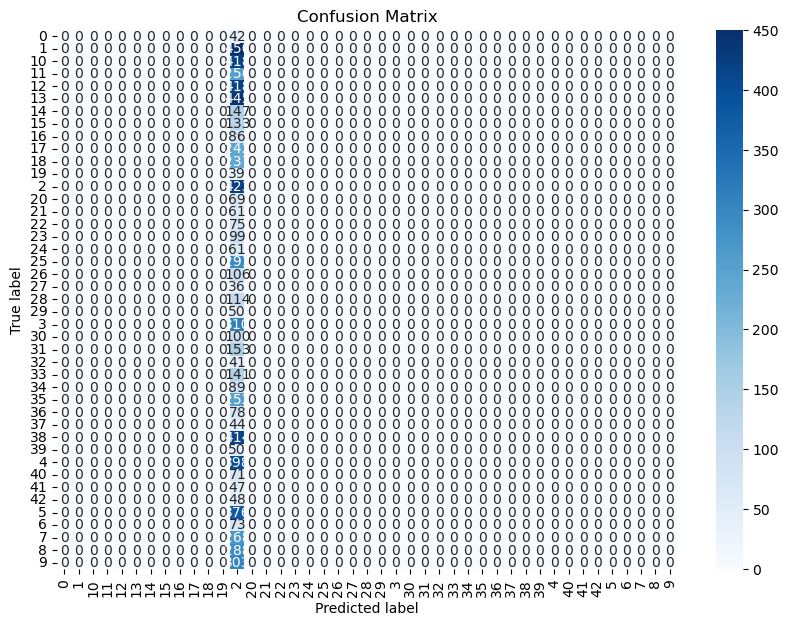

c:\Users\asman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.00      0.00      0.00       450
           2       0.00      0.00      0.00       418
           3       0.00      0.00      0.00       256
           4       0.00      0.00      0.00       418
           5       0.00      0.00      0.00       445
           6       0.00      0.00      0.00       147
           7       0.00      0.00      0.00       133
           8       0.00      0.00      0.00        86
           9       0.00      0.00      0.00       242
          10       0.00      0.00      0.00       237
          11       0.00      0.00      0.00        39
          12       0.05      1.00      0.10       423
          13       0.00      0.00      0.00        69
          14       0.00      0.00      0.00        61
          15       0.00      0.00      0.00        75
          16       0.00      0.00      0.00        99
          17       0.00    

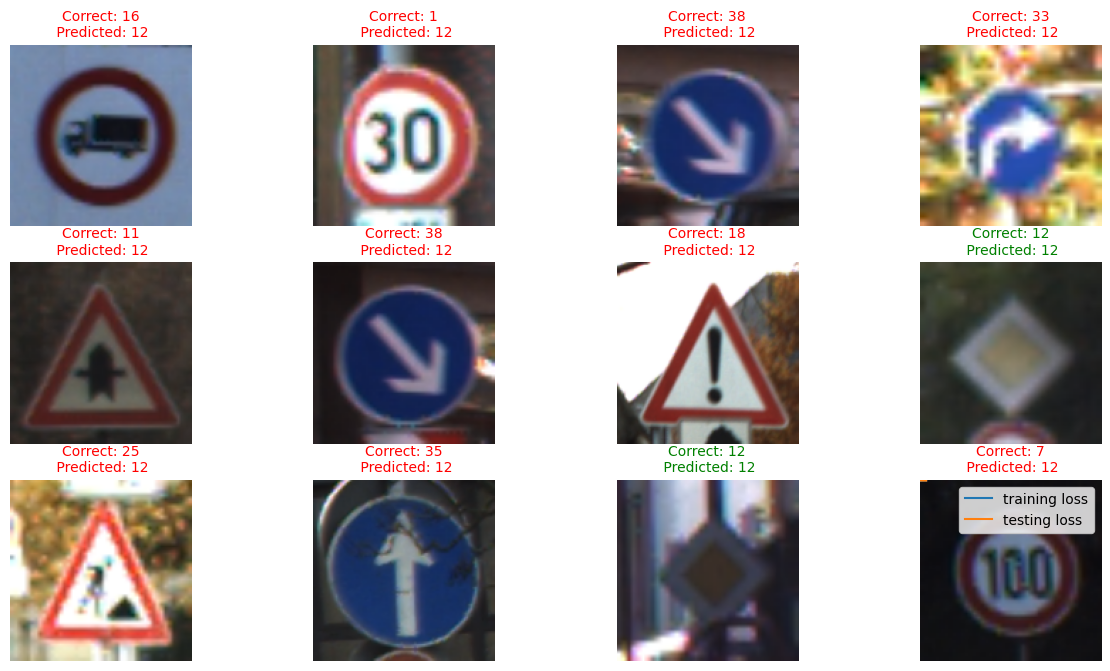

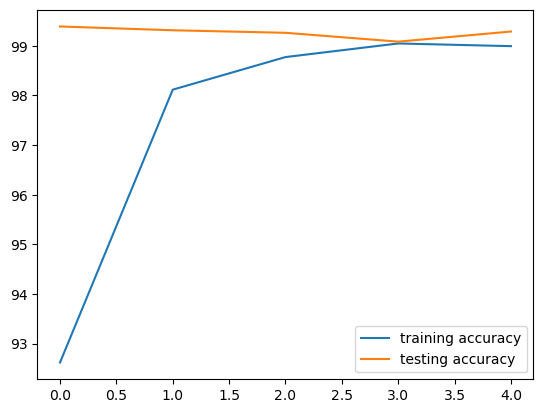

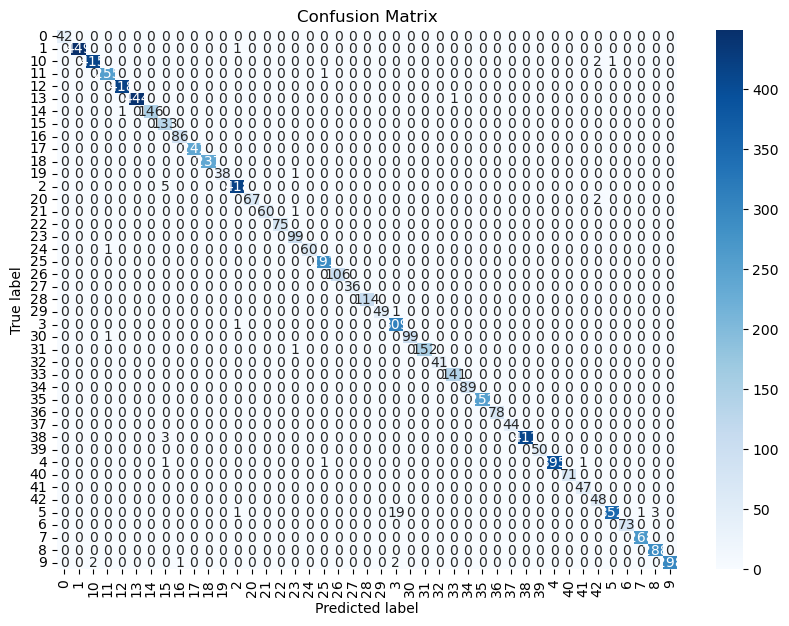

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00       450
           2       1.00      0.99      0.99       418
           3       0.99      1.00      0.99       256
           4       1.00      1.00      1.00       418
           5       1.00      1.00      1.00       445
           6       1.00      0.99      1.00       147
           7       0.94      1.00      0.97       133
           8       0.99      1.00      0.99        86
           9       1.00      1.00      1.00       242
          10       1.00      1.00      1.00       237
          11       1.00      0.97      0.99        39
          12       0.99      0.99      0.99       423
          13       1.00      0.97      0.99        69
          14       1.00      0.98      0.99        61
          15       1.00      1.00      1.00        75
          16       0.97      1.00      0.99        99
          17       1.00    

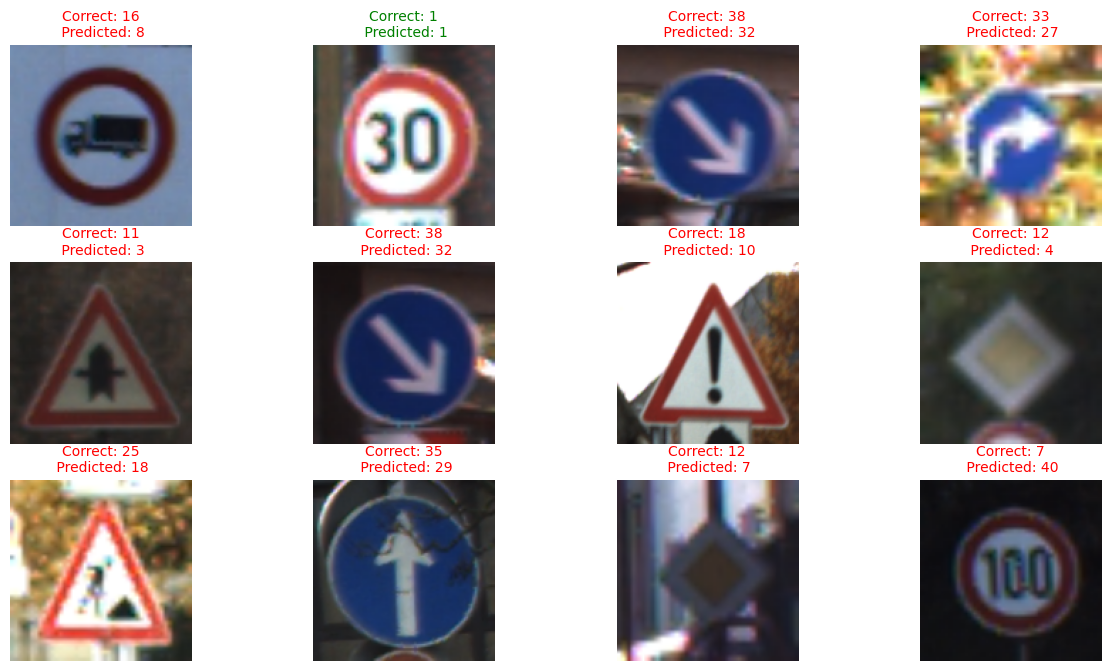

In [5]:
model_names = ['vgg19', 'mobilenet']

for model_name in model_names:
    print(f'Training {model_name}...')
    
    model = load_pretrained_model(model_name, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    history = train(model,train_loader,test_loader,device,num_epochs,optimizer,criterion, learning_rate = 1e-3)
    # Test Accuracy
    eval(model,test_loader,device)
    # Evaluate model
    y_true, y_pred = evaluate_model(model, test_loader,device)
    
    # Plot results
    plot_accuracy_loss(history,mode='loss')
    plot_accuracy_loss(history,mode='accuracy')

    plot_confusion_matrix(y_true, y_pred, classes)
    plot_classification_report(y_true, y_pred)
    roc = roc_auc_score(y_true,y_pred,multi_class='ovr')
    print(f'Roc score: {roc:.4f}')
    # Evaluate the model with images
    evaluate_model_with_images(model,'Test.csv',num_images=12,test_folder='Test',batch_size=16)


## Performance Comparison

In [6]:
performance = pd.DataFrame({
    'Models' : ['Custom CNN', 'VGG19', 'mobilenet'],
    'accuracy': ['97.84%', '5.39%','99.29%'],
    'ROC Score': [0.9997,0.5001,1.0000]
})
performance

,Models,accuracy,ROC Score
0,Custom CNN,97.84%,0.9997
1,VGG19,5.39%,0.5001
2,mobilenet,99.29%,1.0000


## Insights:
1. Our ```custom CNN``` achieved high accuracy ```97.84%```and roc score of ```0.9997```, which shows promising results.
2. When using pretrained ```VGG19``` on the data, it performed poorly, suggesting that the model didn't learn and was just guessing.
3. The best performance was achieved upon using ```mobilenet```, as it gave an accuracy of ```99.29%``` and a roc score of ```1.0```.